#  Keras Intro: Shallow Models

Keras Documentation: https://keras.io

In this notebook we explore how to use Keras to implement 2 traditional Machine Learning models:
- **Linear Regression** to predict continuous data
- **Logistic Regression** to predict categorical data

## Linear Regression

We start from the simplest regression model possible: **Linear Regression** with 1 feature in input and one value in output. Predict the weight of a person from their height.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 0. Load data

In [3]:
df = pd.read_csv('../data/weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


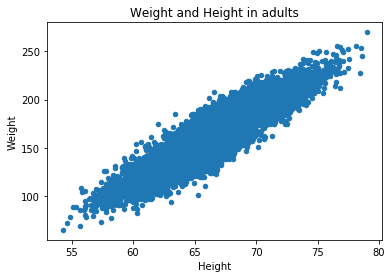

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

### 1. Create Train/Test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['Height']].values
y = df['Weight'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

### 2. Train Linear Regression Model

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [13]:
model = Sequential([
    Dense(1, input_shape=(1,))
])

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(Adam(lr=0.9), 'mean_squared_error')

Instructions for updating:
Use tf.cast instead.


In [16]:
model.fit(X_train, y_train, epochs=40)

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
7000/7000 [==============================] - 1s 188us/sample - loss: 1271.8317
Epoch 2/40
7000/7000 [==============================] - 0s 54us/sample - loss: 578.5196
Epoch 3/40
7000/7000 [==============================] - 0s 58us/sample - loss: 552.1037
Epoch 4/40
7000/7000 [==============================] - 0s 57us/sample - loss: 521.0012
Epoch 5/40
7000/7000 [==============================] - 0s 54us/sample - loss: 506.1394
Epoch 6/40
7000/7000 [==============================] - 0s 59us/sample - loss: 469.7560
Epoch 7/40
7000/7000 [==============================] - 0s 60us/sample - loss: 440.2444
Epoch 8/40
7000/7000 [==============================] - 0s 71us/sample - loss: 399.3435
Epoch 9/40
7000/7000 [==============================] - 1s 76us/sample - loss: 378.6829
Epoch 10/40
7000/7000 [==============================] - 0s 65us/sample - loss: 363.6683
Epoch 11/40
7000/7000 [==============================] - 0s 61us/samp

### 3. Evaluate Model Performance

In [17]:
from sklearn.metrics import r2_score

In [18]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [19]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.852
The R2 score on the Test set is:	0.850


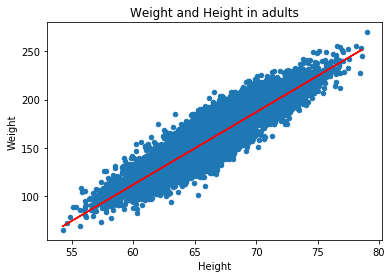

In [20]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X_test, y_test_pred, color='red')

In [21]:
W, B = model.get_weights()

In [22]:
W

array([[7.5378714]], dtype=float32)

In [23]:
B

array([-340.67526], dtype=float32)

# Logistic Regression

We start from the simplest classification model possible: **Logistic Regression** with one feature in input and one **binary output**. Predict the if a user will purchase based on the time spent on a website.

### 0. Load Data

In [25]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [26]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


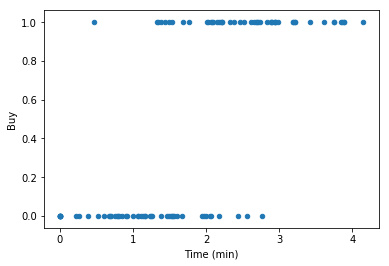

In [27]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

### 1. Create Train/Test split

In [28]:
X = df[['Time (min)']].values
y = df['Buy'].values

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size = 0.3, random_state=0)

### 2. Train Logistic Regression Model

In [31]:
model = Sequential([
    Dense(1, input_shape=(1,), activation='sigmoid')
])

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [34]:
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
70/70 [==============================] - 1s 11ms/sample - loss: 0.7140 - acc: 0.4857
Epoch 2/40
70/70 [==============================] - 0s 363us/sample - loss: 0.6282 - acc: 0.5857
Epoch 3/40
70/70 [==============================] - 0s 345us/sample - loss: 0.6098 - acc: 0.6286
Epoch 4/40
70/70 [==============================] - 0s 297us/sample - loss: 0.5935 - acc: 0.5857
Epoch 5/40
70/70 [==============================] - 0s 294us/sample - loss: 0.5708 - acc: 0.7000
Epoch 6/40
70/70 [==============================] - 0s 256us/sample - loss: 0.5665 - acc: 0.7143
Epoch 7/40
70/70 [==============================] - 0s 239us/sample - loss: 0.5609 - acc: 0.7000
Epoch 8/40
70/70 [==============================] - 0s 244us/sample - loss: 0.5436 - acc: 0.7857
Epoch 9/40
70/70 [==============================] - 0s 229us/sample - loss: 0.6338 - acc: 0.5286
Epoch 10/40
70/70 [==============================] - 0s 187us/sample - loss: 0.5205 - acc: 0.7714
Epoch 11/40
70/70 [===========

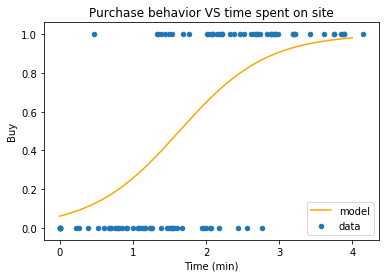

In [35]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

t = np.linspace(0, 4)
ax.plot(t, model.predict(t), color='orange')

plt.legend(['model', 'data'])

### 3. Evaluate Model Performance

#### Accuracy

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

In [38]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The train accuracy score is 0.786
The test accuracy score is 0.933


#### Confusion Matrix & Classification Report

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test, y_test_pred)

array([[15,  1],
       [ 1, 13]])

In [41]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [42]:
pretty_confusion_matrix(y_test, y_test_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,15,1
Buy,1,13


In [43]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.93      0.93      0.93        14

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



## Exercise

- try changing the value of the learning rate (lr) in the optimizer, re-initialize the model and re-train. How does its performance change?